### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")

In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")

In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')

In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### EXTRACTING HUDSON COUNTY ZIPCODE FROM NJ BOUNDARY GEOJSON FILE

In [7]:
#### EXTRACTING ONLY ZIPCODE IN DATASET FROM NJ BOUNDARY FILE 
hudson_county = ['07302', '07030', '07307', '07306', '07310', '07304', '07311',
       '07305', '07032']
new_map = nj_map[nj_map['zipcode'].isin(hudson_county)]

#### SPATIAL JOIN - START STATION ZIPCODE

In [8]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [9]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')

In [10]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [11]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [12]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [13]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [14]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [15]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

#### COMBINING START AND END GEODATAFRAME

In [16]:
#Combing start and end geodataframe and checking for missing zipcode
geo_df = ts_cleaned
geo_df['zip_end'] = te_cleaned['zip_end']
geo_df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
startweekday             0
endweekday               0
starttime                0
endtime                  0
month                    0
tripduration             0
geometry                 0
index_right              0
zip_start                0
zip_end               1372
dtype: int64

In [17]:
#dropping rows with missing zipcodes for end stations
geo_df.dropna(axis=0,inplace=True)
geo_df.shape

(943895, 23)

In [18]:
### Splitting DataFrame into Weekdays an Weekends by using Filter
# Filter out weekdays vs weekends
list1 = ['Monday','Tuesday','Wednesday','Thursday','Friday']
list2 = ['Saturday','Sunday']
weekdays = geo_df[geo_df['startweekday'].isin(list1)]
weekends = geo_df[geo_df['startweekday'].isin(list2)]

###### Weekday Morning Peak

In [19]:
mor_peak_start= weekdays[(weekdays['starttime'] >= 6) & (weekdays['starttime'] <= 9)]
mor_peak_start.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
9,B6BE7734312C15E0,classic_bike,2022-08-03 07:55:12,2022-08-03 08:00:24,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Mama Johnson Field - 4 St & Jackson St,HB404,40.737175,-74.027727,...,Wednesday,Wednesday,7,8,August,5.2,POINT (-74.02773 40.73717),549.0,07030,07030


In [20]:
mor_start_hrly = mor_peak_start.groupby(['starttime','zip_start'],as_index=False)[['ride_id']].count()
mor_start_hrly.columns = ['hour','zip_start','start_count']
mor_start_hrly

,hour,zip_start,start_count
0,6,07030,9846
1,6,07302,6942
2,6,07304,1802
3,6,07305,146
4,6,07306,2039
5,6,07307,695
6,6,07310,965
7,6,07311,16
8,7,07030,17447
9,7,07302,14086


In [21]:
mor_peak_end = weekdays[(weekdays['endtime'] >= 6) & (weekdays['endtime'] <= 9)]
mor_peak_end.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
9,B6BE7734312C15E0,classic_bike,2022-08-03 07:55:12,2022-08-03 08:00:24,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Mama Johnson Field - 4 St & Jackson St,HB404,40.737175,-74.027727,...,Wednesday,Wednesday,7,8,August,5.2,POINT (-74.02773 40.73717),549.0,07030,07030


In [22]:
mor_end_hrly = mor_peak_end.groupby(['endtime','zip_end'],as_index=False)[['ride_id']].count()
mor_end_hrly.columns = ['hour','zip_end','end_count']
mor_end_hrly

,hour,zip_end,end_count
0,6,07030,9815
1,6,07302,6892
2,6,07304,235
3,6,07305,38
4,6,07306,2154
5,6,07307,316
6,6,07310,1058
7,6,07311,474
8,7,07030,17062
9,7,07302,14128


In [23]:
surdef = mor_start_hrly.merge(mor_end_hrly,left_on = ['hour','zip_start'],right_on = ['hour','zip_end'],how = 'outer')
surdef['diff'] = surdef['end_count'] - surdef['start_count']
surdef['avg'] = np.round(surdef['diff']/365 ,2)
surdef

,hour,zip_start,start_count,zip_end,end_count,diff,avg
0,6,07030,9846,07030,9815,-31,-0.08
1,6,07302,6942,07302,6892,-50,-0.14
2,6,07304,1802,07304,235,-1567,-4.29
3,6,07305,146,07305,38,-108,-0.30
4,6,07306,2039,07306,2154,115,0.32
5,6,07307,695,07307,316,-379,-1.04
6,6,07310,965,07310,1058,93,0.25
7,6,07311,16,07311,474,458,1.25
8,7,07030,17447,07030,17062,-385,-1.05
9,7,07302,14086,07302,14128,42,0.12


In [24]:
#merge zip duration with hudson county map
morpeak = new_map.merge(
    surdef, 
    left_on='zipcode',
    right_on = 'zip_start',
    how='left')
morpeak

,zipcode,geometry,hour,zip_start,start_count,zip_end,end_count,diff,avg
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",6.0,07306,2039.0,07306,2154.0,115.0,0.32
2,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",7.0,07306,2779.0,07306,3107.0,328.0,0.90
3,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",8.0,07306,4949.0,07306,5053.0,104.0,0.28
4,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",9.0,07306,2399.0,07306,2676.0,277.0,0.76
5,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",6.0,07311,16.0,07311,474.0,458.0,1.25
6,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",7.0,07311,55.0,07311,970.0,915.0,2.51
7,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",8.0,07311,147.0,07311,1105.0,958.0,2.62
8,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",9.0,07311,127.0,07311,370.0,243.0,0.67
9,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",6.0,07302,6942.0,07302,6892.0,-50.0,-0.14


[]

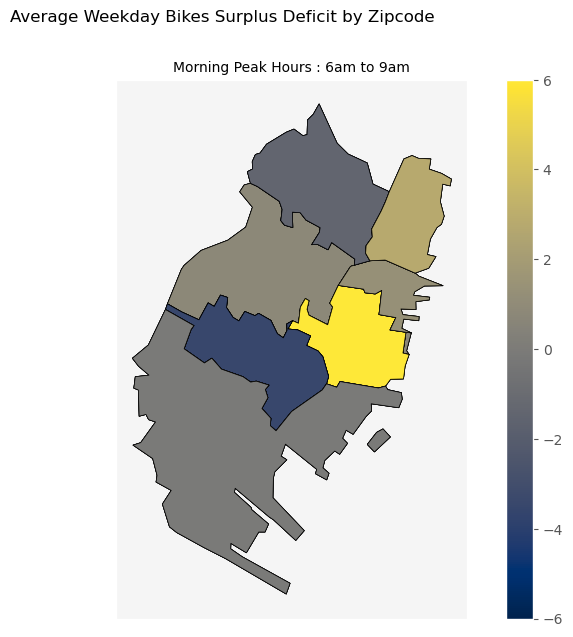

In [25]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=-6,vmax=6)
fig, ax = plt.subplots(figsize=(10,7))

fig.suptitle('Average Weekday Bikes Surplus Deficit by Zipcode', fontsize=12)

morpeak.plot(ax=ax, column= 'avg', cmap='cividis',norm= norm,edgecolor = 'black',legend=True)


ax.set_title(label ='Morning Peak Hours : 6am to 9am',loc='center', fontsize = 10)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])

In [26]:
##### Trips that start and end in same zipcode during morning peak hour

mor_zip_same = mor_start_hrly.merge(mor_end_hrly,left_on = ['hour','zip_start'],right_on = ['hour','zip_end'],how = 'outer')
mor_zip_same['tripcount'] = mor_zip_same['start_count'] + mor_zip_same['end_count']
mor_zip_same = mor_zip_same.groupby(['zip_start','zip_end'],as_index=False).agg({'tripcount':'sum'})

In [27]:
mor_zip_same

,zip_start,zip_end,tripcount
0,07030,07030,122664
1,07302,07302,102436
2,07304,07304,13341
3,07305,07305,697
4,07306,07306,25156
5,07307,07307,6384
6,07310,07310,19215
7,07311,07311,3264


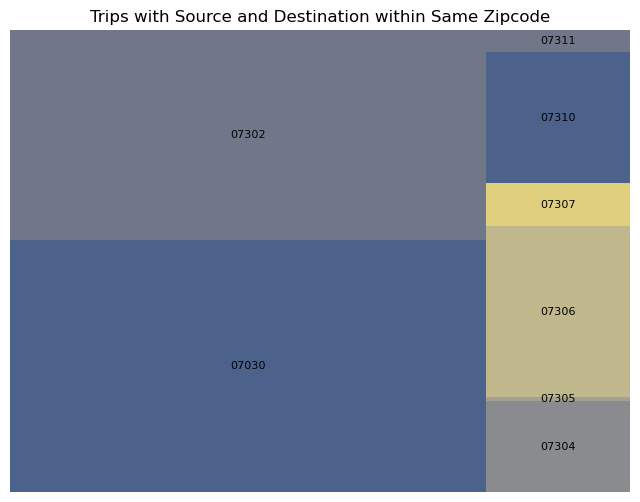

In [28]:
#library for creating tree map
import squarify
import seaborn as sb

#size of the plot
plt.figure(figsize = (8,6))

# Plot the treemap
squarify.plot(sizes = mor_zip_same['tripcount'],label = mor_zip_same['zip_start'], alpha = 0.8, text_kwargs = {'fontsize':8},
              color=sb.color_palette("cividis"))
plt.title('Trips with Source and Destination within Same Zipcode', fontsize=12)

#remove labels on x and y axis
plt.axis('off')

#display graph
plt.show();

In [29]:
#### Plot 07030,07302 on map

[]

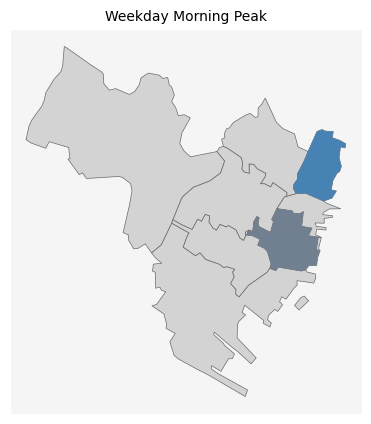

In [30]:
# maps depicting most frequent trip paths between zipcodes

fig,ax = plt.subplots(figsize=(10, 5))

#fig.suptitle('Trips with source and Destination within Same Zipcode', fontsize=12)

new_map.plot(ax=ax, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax, facecolor='slategray', linewidth=1)
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax, facecolor='steelblue', linewidth=1)


ax.set_title(label = 'Weekday Morning Peak',loc='center', fontsize = 10)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])

In [31]:
#### Trips that start and end in different zipcode during morning peak hour

In [32]:
surdef9 = mor_start_hrly.merge(mor_end_hrly,left_on = 'hour',right_on ='hour',how = 'outer')
surdef9['totalcount'] = surdef9['start_count'] + surdef9['end_count']
surdef9

,hour,zip_start,start_count,zip_end,end_count,totalcount
0,6,07030,9846,07030,9815,19661
1,6,07030,9846,07302,6892,16738
2,6,07030,9846,07304,235,10081
3,6,07030,9846,07305,38,9884
4,6,07030,9846,07306,2154,12000
...,...,...,...,...,...,...
251,9,07311,127,07305,63,190
252,9,07311,127,07306,2676,2803
253,9,07311,127,07307,480,607
254,9,07311,127,07310,2844,2971


In [33]:
surdef10 = pd.DataFrame(surdef9[['zip_start','zip_end','totalcount']])
surdef10 = surdef10[surdef10['zip_start'] != surdef10['zip_end']]
surdef10

,zip_start,zip_end,totalcount
1,07030,07302,16738
2,07030,07304,10081
3,07030,07305,9884
4,07030,07306,12000
5,07030,07307,10162
...,...,...,...
250,07311,07304,704
251,07311,07305,190
252,07311,07306,2803
253,07311,07307,607


In [34]:
diff_zip = surdef10.groupby(['zip_start','zip_end'],as_index=False).agg(trip_count = ('totalcount','sum')).sort_values(by ='trip_count',ascending=False)
#diff_zip.columns = ['zipcode','trips_count']
diff_zip

,zip_start,zip_end,trip_count
0,07030,07302,113956
7,07302,07030,111144
3,07030,07306,74074
28,07306,07030,73746
14,07304,07030,72576
5,07030,07310,72265
42,07310,07030,69614
35,07307,07030,66567
29,07306,07302,65038
6,07030,07311,64003


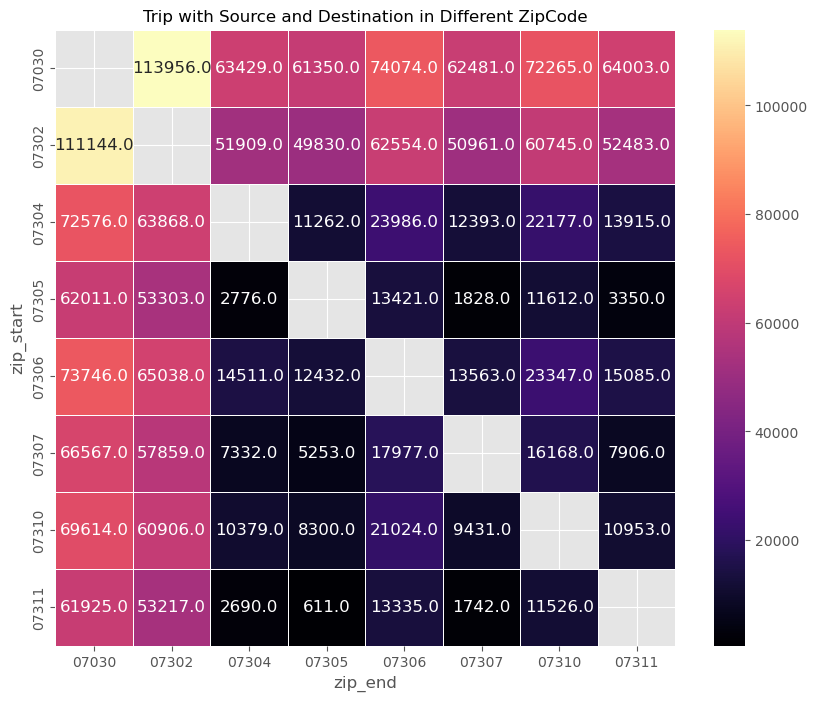

In [35]:
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(10, 8))

diff_zip = diff_zip.pivot(index=['zip_start'],columns=['zip_end'],values='trip_count')

mask = np.zeros_like(diff_zip, dtype=bool)
np.fill_diagonal(mask, True)

formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}')


#Use seaborn to create the heat map

sns.heatmap(diff_zip, cmap="magma", linewidths=.5, annot=True, annot_kws={"size": 12},  fmt='', mask=mask, cbar_kws={'format': formatter})
plt.title('Trip with Source and Destination in Different ZipCode',fontsize=12)
plt.show()

[]

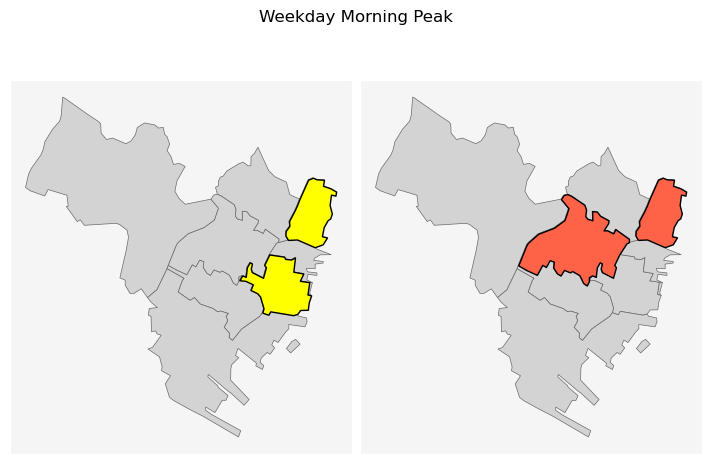

In [36]:
#fig,(ax1,ax2) = plt.subplots(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7, 5), sharex=True,sharey=True,constrained_layout=True)

fig.suptitle('Weekday Morning Peak', fontsize=12)

new_map.plot(ax=ax1, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax1, facecolor='yellow',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax1, facecolor='yellow',edgecolor='black', linewidth=1)

new_map.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax2, facecolor='tomato',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07306'].plot(ax=ax2, facecolor='tomato',edgecolor='black',linewidth=1)


#new_map.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
#new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax, facecolor='steelblue', linewidth=1)
#new_map.loc[new_map['zipcode'] == '07304'].plot(ax=ax, facecolor='dimgray', linewidth=1)

ax.set_title(label ='Trips within Same Zipcode',loc='center', fontsize = 10)

ax1.set_facecolor("whitesmoke")

ax2.set_facecolor("whitesmoke")

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

###### Weekday Evening Peak

In [37]:
eve_peak_start = weekdays[(weekdays['starttime'] >= 16) & (weekdays['starttime'] <= 19)]
eve_peak_start.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,Friday,Friday,18,18,August,6.63,POINT (-74.03891 40.71836),414.0,07302,07302


In [38]:
eve_start_hrly = eve_peak_start.groupby(['starttime','zip_start'],as_index=False)[['ride_id']].count()
eve_start_hrly.columns = ['hour','zip_start','start_count']
eve_start_hrly

,hour,zip_start,start_count
0,16,07030,21245
1,16,07302,14673
2,16,07304,1412
3,16,07305,167
4,16,07306,4448
5,16,07307,860
6,16,07310,4156
7,16,07311,489
8,17,07030,33165
9,17,07032,1


In [39]:
eve_peak_end = weekdays[(weekdays['starttime'] >= 16) & (weekdays['starttime'] <= 19)]
eve_peak_end.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,Friday,Friday,18,18,August,6.63,POINT (-74.03891 40.71836),414.0,07302,07302


In [40]:
eve_end_hrly = eve_peak_end.groupby(['endtime','zip_end'],as_index=False)[['ride_id']].count()
eve_end_hrly.columns = ['hour','zip_end','end_count']
eve_end_hrly

,hour,zip_end,end_count
0,16,07030,18391
1,16,07302,12387
2,16,07304,1929
3,16,07305,111
4,16,07306,2724
5,16,07307,845
6,16,07310,2979
7,16,07311,212
8,17,07030,32070
9,17,07032,1


In [41]:
sd_evep = eve_start_hrly.merge(eve_end_hrly,left_on = ['hour','zip_start'],right_on = ['hour','zip_end'],how = 'inner')
sd_evep['diff1'] = sd_evep['end_count'] - sd_evep['start_count']
sd_evep['avg1'] = np.round(sd_evep['diff1']/365 ,2)
sd_evep

,hour,zip_start,start_count,zip_end,end_count,diff1,avg1
0,16,07030,21245,07030,18391,-2854,-7.82
1,16,07302,14673,07302,12387,-2286,-6.26
2,16,07304,1412,07304,1929,517,1.42
3,16,07305,167,07305,111,-56,-0.15
4,16,07306,4448,07306,2724,-1724,-4.72
5,16,07307,860,07307,845,-15,-0.04
6,16,07310,4156,07310,2979,-1177,-3.22
7,16,07311,489,07311,212,-277,-0.76
8,17,07030,33165,07030,32070,-1095,-3.00
9,17,07032,1,07032,1,0,0.00


In [42]:
#merge zip duration with hudson county map
evepeak = new_map.merge(
    sd_evep, 
    left_on='zipcode',
    right_on = 'zip_start',
    how='left')
evepeak

,zipcode,geometry,hour,zip_start,start_count,zip_end,end_count,diff1,avg1
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",17,07032,1,07032,1,0,0.00
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",16,07306,4448,07306,2724,-1724,-4.72
2,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",17,07306,5895,07306,4224,-1671,-4.58
3,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",18,07306,5998,07306,4580,-1418,-3.88
4,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",19,07306,3998,07306,3604,-394,-1.08
5,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",16,07311,489,07311,212,-277,-0.76
6,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",17,07311,1025,07311,396,-629,-1.72
7,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",18,07311,1008,07311,406,-602,-1.65
8,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",19,07311,583,07311,334,-249,-0.68
9,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",16,07302,14673,07302,12387,-2286,-6.26


[]

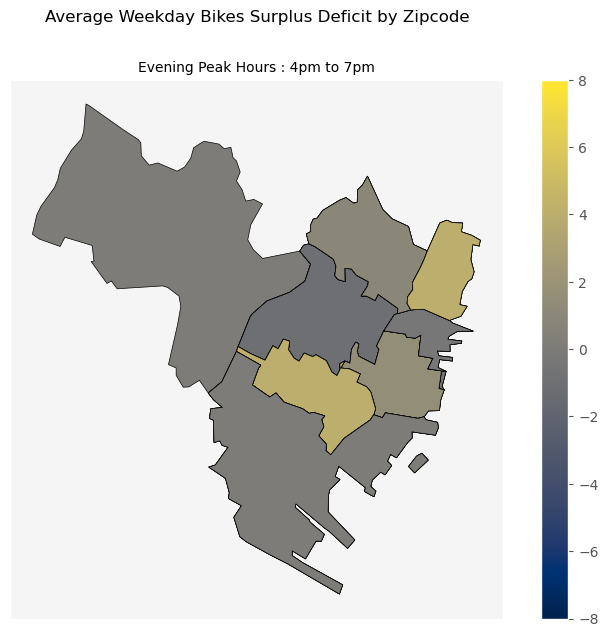

In [43]:

from matplotlib.colors import Normalize
norm = Normalize(vmin=-8,vmax=8)

fig, ax = plt.subplots(figsize=(10,7))

fig.suptitle('Average Weekday Bikes Surplus Deficit by Zipcode', fontsize=12)

evepeak.plot(ax=ax, column= 'avg1', cmap='cividis',norm=norm,edgecolor ='black',legend=True)


ax.set_title(label ='Evening Peak Hours : 4pm to 7pm',loc='center', fontsize = 10)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])

In [44]:
##### Trips that start and end in same zipcode during morning peak hour
eve_zip_same = eve_start_hrly.merge(eve_end_hrly,left_on = ['hour','zip_start'],right_on = ['hour','zip_end'],how = 'outer')
eve_zip_same['tripcount'] = eve_zip_same['start_count'] + eve_zip_same['end_count']
eve_zip_same = eve_zip_same.groupby(['zip_start','zip_end'],as_index=False).agg({'tripcount':'sum'})

In [45]:
eve_zip_same

,zip_start,zip_end,tripcount
0,07030,07030,230878.0
1,07032,07032,2.0
2,07302,07302,155474.0
3,07304,07304,18584.0
4,07305,07305,1165.0
5,07306,07306,35471.0
6,07307,07307,10774.0
7,07310,07310,38204.0
8,07311,07311,4453.0


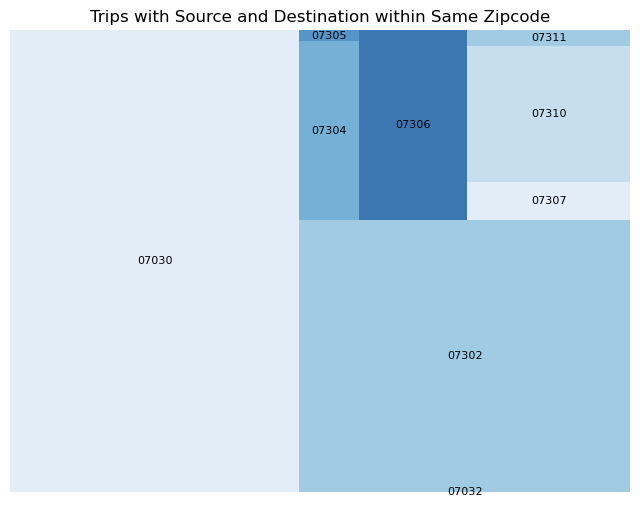

In [46]:
#library for creating tree map
import squarify
import seaborn as sb

#size of the plot
plt.figure(figsize = (8,6))

# Plot the treemap
squarify.plot(sizes = eve_zip_same['tripcount'],label = eve_zip_same['zip_start'], alpha = 0.8, text_kwargs = {'fontsize':8},
              color=sb.color_palette("Blues"))


#remove labels on x and y axis
plt.axis('off')
plt.title('Trips with Source and Destination within Same Zipcode', fontsize=12)

#display graph
plt.show();

[]

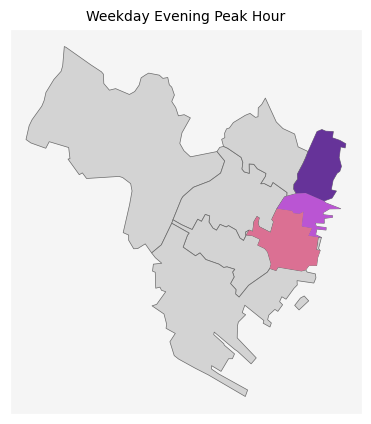

In [47]:
# maps depicting most frequent trip paths between zipcodes

fig,ax = plt.subplots(figsize=(8,5))


new_map.plot(ax=ax, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax, facecolor='rebeccapurple')
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax, facecolor='palevioletred')
new_map.loc[new_map['zipcode'] == '07310'].plot(ax=ax, facecolor='mediumorchid')


ax.set_title(label ='Weekday Evening Peak Hour',loc='center', fontsize = 10)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])


In [48]:
#### Trips that start and end in different zipcode during evening peak hour

In [49]:
surdef11 = eve_start_hrly.merge(eve_end_hrly,left_on = 'hour',right_on ='hour',how = 'outer')
surdef11['totalcount'] = surdef11['start_count'] + surdef11['end_count']


In [50]:
surdef11.dropna(axis=0,inplace=True)
surdef11

,hour,zip_start,start_count,zip_end,end_count,totalcount
0,16,07030,21245.0,07030,18391,39636.0
1,16,07030,21245.0,07302,12387,33632.0
2,16,07030,21245.0,07304,1929,23174.0
3,16,07030,21245.0,07305,111,21356.0
4,16,07030,21245.0,07306,2724,23969.0
...,...,...,...,...,...,...
268,19,07311,583.0,07305,127,710.0
269,19,07311,583.0,07306,3604,4187.0
270,19,07311,583.0,07307,1507,2090.0
271,19,07311,583.0,07310,4297,4880.0


In [51]:
surdef12 = pd.DataFrame(surdef11[['zip_start','zip_end','totalcount']])
surdef12 = surdef12[surdef12['zip_start'] != surdef12['zip_end']]
surdef12


,zip_start,zip_end,totalcount
1,07030,07302,33632.0
2,07030,07304,23174.0
3,07030,07305,21356.0
4,07030,07306,23969.0
5,07030,07307,22090.0
...,...,...,...
267,07311,07304,3457.0
268,07311,07305,710.0
269,07311,07306,4187.0
270,07311,07307,2090.0


In [52]:

diff_zip1 = surdef12.groupby(['zip_start','zip_end'],as_index=False).agg(trip_count = ('totalcount','sum')).sort_values(by ='trip_count',ascending=False)
#diff_zip.columns = ['zipcode','trips_count']
diff_zip1

,zip_start,zip_end,trip_count
16,07302,07030,193879.0
1,07030,07302,192473.0
56,07310,07030,135845.0
40,07306,07030,135183.0
6,07030,07310,133237.0
4,07030,07306,131166.0
2,07030,07304,127853.0
5,07030,07307,122272.0
24,07304,07030,121609.0
48,07307,07030,119380.0


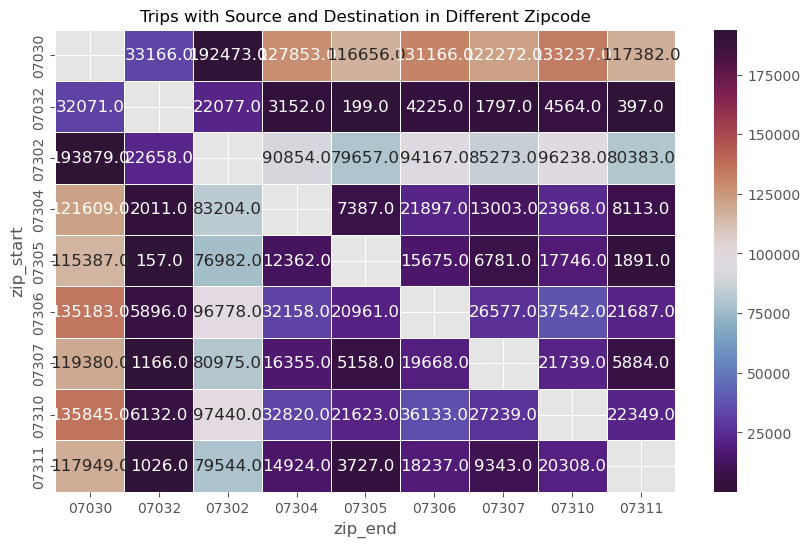

In [53]:
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(10,6))

diff_zip1 = diff_zip1.pivot(index=['zip_start'],columns=['zip_end'],values='trip_count')

mask = np.zeros_like(diff_zip1, dtype=bool)
np.fill_diagonal(mask, True)

formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}')


#Use seaborn to create the heat map

sns.heatmap(diff_zip1, cmap="twilight_shifted", linewidths=.5, annot=True, annot_kws={"size": 12},  fmt='', mask=mask, cbar_kws={'format': formatter})
plt.title('Trips with Source and Destination in Different Zipcode', fontsize=12)


plt.show()


[]

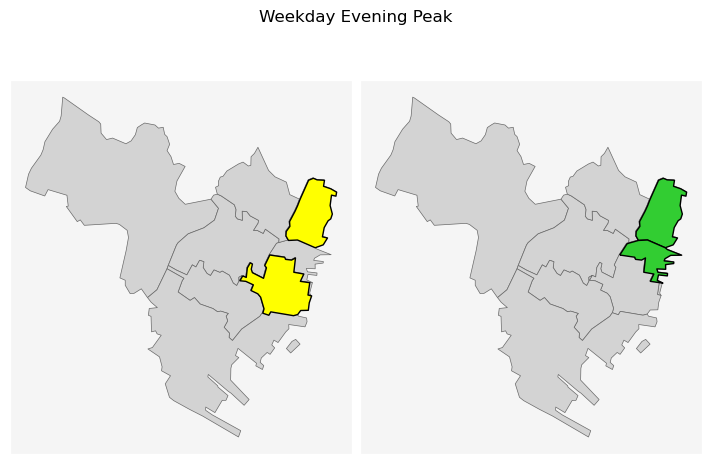

In [54]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7, 5), sharex=True,sharey=True,constrained_layout=True)

fig.suptitle('Weekday Evening Peak', fontsize=12)

new_map.plot(ax=ax1, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax1, facecolor='yellow',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax1, facecolor='yellow',edgecolor='black', linewidth=1)

new_map.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax2, facecolor='limegreen',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07310'].plot(ax=ax2, facecolor='limegreen',edgecolor='black',linewidth=1)


ax.set_title(label ='Trips within Same Zipcode',loc='center', fontsize = 10)

ax1.set_facecolor("whitesmoke")

ax2.set_facecolor("whitesmoke")

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

#### WEEKEND ANALYSIS

###### Weekdend Morning to Evening Peak Hours

In [55]:
wknd_peak_start = weekends[(weekends['starttime'] >= 10) & (weekends['starttime'] <= 19)]
wknd_peak_start.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,Sunday,Sunday,13,13,August,10.13,POINT (-74.03891 40.71836),414.0,07302,07302


In [56]:
wknd_start_hrly = wknd_peak_start.groupby(['starttime','zip_start'],as_index=False)[['ride_id']].count()
wknd_start_hrly.columns = ['hour','zip_start','start_count']
wknd_start_hrly

,hour,zip_start,start_count
0,10,07030,6789
1,10,07302,4938
2,10,07304,817
3,10,07305,49
4,10,07306,1138
5,10,07307,425
6,10,07310,1526
7,10,07311,81
8,11,07030,7792
9,11,07302,5463


In [57]:
wknd_peak_end = weekends[(weekends['endtime'] >= 10) & (weekends['endtime'] <= 19)]
wknd_peak_end.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,Sunday,Sunday,13,13,August,10.13,POINT (-74.03891 40.71836),414.0,07302,07302


In [58]:
wknd_end_hrly = wknd_peak_end.groupby(['endtime','zip_end'],as_index=False)[['ride_id']].count()
wknd_end_hrly.columns = ['hour','zip_end','end_count']
wknd_end_hrly

,hour,zip_end,end_count
0,10,07030,7052
1,10,07302,5002
2,10,07304,425
3,10,07305,35
4,10,07306,909
5,10,07307,267
6,10,07310,1272
7,10,07311,143
8,11,07030,8012
9,11,07302,5432


In [59]:
sdwkndp = wknd_start_hrly.merge(wknd_end_hrly,left_on = ['hour','zip_start'],right_on = ['hour','zip_end'],how = 'outer')
sdwkndp['diff2'] = sdwkndp['end_count'] - sdwkndp['start_count']
sdwkndp['avg2'] = np.round(sdwkndp['diff2']/365 ,2)
sdwkndp

,hour,zip_start,start_count,zip_end,end_count,diff2,avg2
0,10,07030,6789,07030,7052,263,0.72
1,10,07302,4938,07302,5002,64,0.18
2,10,07304,817,07304,425,-392,-1.07
3,10,07305,49,07305,35,-14,-0.04
4,10,07306,1138,07306,909,-229,-0.63
5,10,07307,425,07307,267,-158,-0.43
6,10,07310,1526,07310,1272,-254,-0.70
7,10,07311,81,07311,143,62,0.17
8,11,07030,7792,07030,8012,220,0.60
9,11,07302,5463,07302,5432,-31,-0.08


In [60]:
#merge zip duration with hudson county map
wkndpeak = new_map.merge(
    sdwkndp, 
    left_on='zipcode',
    right_on = 'zip_start',
    how='left')
wkndpeak

,zipcode,geometry,hour,zip_start,start_count,zip_end,end_count,diff2,avg2
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",10.0,07306,1138.0,07306,909.0,-229.0,-0.63
2,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",11.0,07306,1174.0,07306,984.0,-190.0,-0.52
3,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",12.0,07306,1218.0,07306,970.0,-248.0,-0.68
4,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",13.0,07306,1311.0,07306,1100.0,-211.0,-0.58
5,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",14.0,07306,1331.0,07306,1119.0,-212.0,-0.58
6,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",15.0,07306,1416.0,07306,1200.0,-216.0,-0.59
7,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",16.0,07306,1385.0,07306,1123.0,-262.0,-0.72
8,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",17.0,07306,1310.0,07306,1139.0,-171.0,-0.47
9,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",18.0,07306,1152.0,07306,1025.0,-127.0,-0.35


In [61]:
print(wkndpeak['avg2'].min())
print(wkndpeak['avg2'].max())

-1.07
1.21


[]

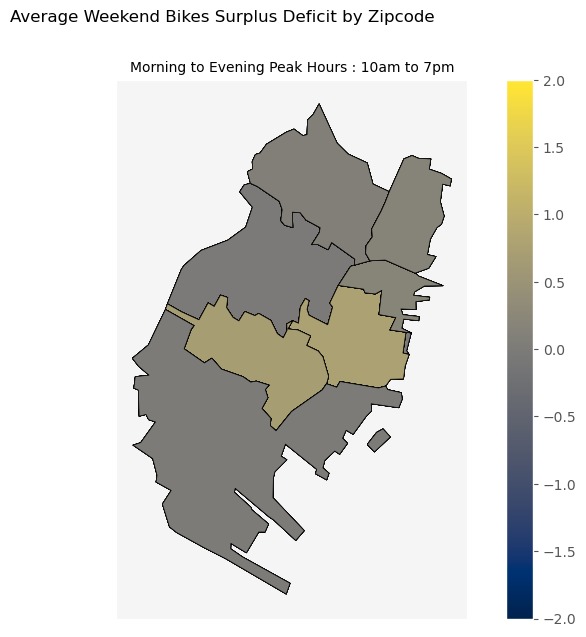

In [62]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=-2,vmax=2)

fig, ax = plt.subplots(figsize=(10,7))

fig.suptitle('Average Weekend Bikes Surplus Deficit by Zipcode', fontsize=12)

wkndpeak.plot(ax=ax, column= 'avg2', cmap='cividis',norm=norm,edgecolor ='black',legend=True)


ax.set_title(label ='Morning to Evening Peak Hours : 10am to 7pm',loc='center', fontsize = 10)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])


In [63]:
##### Trips that start and end in same zipcode during morning peak hour
wknd_zip_same = wknd_start_hrly.merge(wknd_end_hrly,left_on = ['hour','zip_start'],right_on = ['hour','zip_end'],how = 'outer')

wknd_zip_same['tripcount'] = wknd_zip_same['start_count'] + wknd_zip_same['end_count']
wknd_zip_same = wknd_zip_same.groupby(['zip_start','zip_end'],as_index=False).agg({'tripcount':'sum'})

In [64]:
wknd_zip_same

,zip_start,zip_end,tripcount
0,07030,07030,162575
1,07302,07302,113652
2,07304,07304,14787
3,07305,07305,1024
4,07306,07306,22859
5,07307,07307,7844
6,07310,07310,32716
7,07311,07311,2905


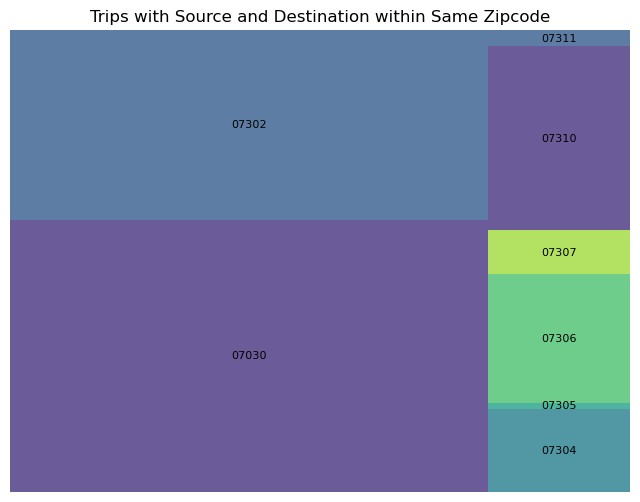

In [65]:
#library for creating tree map
import squarify
import seaborn as sb

#size of the plot
plt.figure(figsize = (8,6))

# Plot the treemap
squarify.plot(sizes = wknd_zip_same['tripcount'],label = wknd_zip_same['zip_start'], alpha = 0.8, text_kwargs = {'fontsize':8},
              color=sb.color_palette("viridis"))

plt.title('Trips with Source and Destination within Same Zipcode', fontsize=12)

#remove labels on x and y axis
plt.axis('off')

#display graph
plt.show();

[]

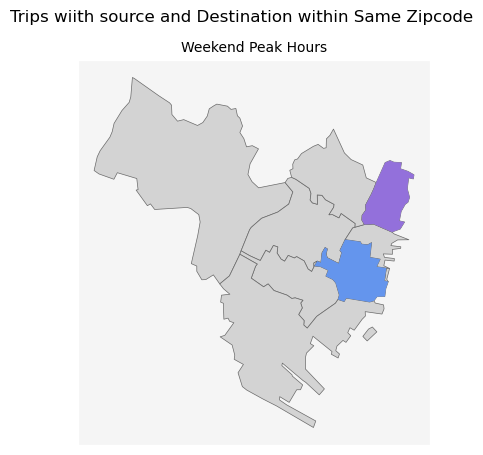

In [66]:
# maps depicting most frequent trip paths between zipcodes

fig,ax = plt.subplots(figsize=(10, 5))

fig.suptitle('Trips wiith source and Destination within Same Zipcode', fontsize=12)

new_map.plot(ax=ax, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax, facecolor='mediumpurple')
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax, facecolor='cornflowerblue')


ax.set_title(label ='Weekend Peak Hours',loc='center', fontsize = 10)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])


In [67]:
#### Trips that start and end in different zipcode during weekend morning to evening peak hour

In [68]:
surdef13 = wknd_start_hrly.merge(wknd_end_hrly,left_on = 'hour',right_on ='hour',how = 'outer')
surdef13['totalcount'] = surdef13['start_count'] + surdef13['end_count']

In [69]:
surdef13.dropna(axis=0,inplace=True)
surdef13

,hour,zip_start,start_count,zip_end,end_count,totalcount
0,10,07030,6789,07030,7052,13841
1,10,07030,6789,07302,5002,11791
2,10,07030,6789,07304,425,7214
3,10,07030,6789,07305,35,6824
4,10,07030,6789,07306,909,7698
...,...,...,...,...,...,...
635,19,07311,122,07305,56,178
636,19,07311,122,07306,924,1046
637,19,07311,122,07307,344,466
638,19,07311,122,07310,1285,1407


In [70]:
surdef14 = pd.DataFrame(surdef13[['zip_start','zip_end','totalcount']])
surdef14 = surdef14[surdef14['zip_start'] != surdef14['zip_end']]
surdef14

,zip_start,zip_end,totalcount
1,07030,07302,11791
2,07030,07304,7214
3,07030,07305,6824
4,07030,07306,7698
5,07030,07307,7056
...,...,...,...
634,07311,07304,847
635,07311,07305,178
636,07311,07306,1046
637,07311,07307,466


In [71]:
diff_zip2 = surdef14.groupby(['zip_start','zip_end'],as_index=False).agg(trip_count = ('totalcount','sum')).sort_values(by ='trip_count',ascending=False)
#diff_zip.columns = ['zipcode','trips_count']
diff_zip2

,zip_start,zip_end,trip_count
0,07030,07302,138660
7,07302,07030,137567
42,07310,07030,97938
5,07030,07310,97353
28,07306,07030,94006
3,07030,07306,91428
14,07304,07030,89368
1,07030,07304,87994
35,07307,07030,85899
4,07030,07307,84520


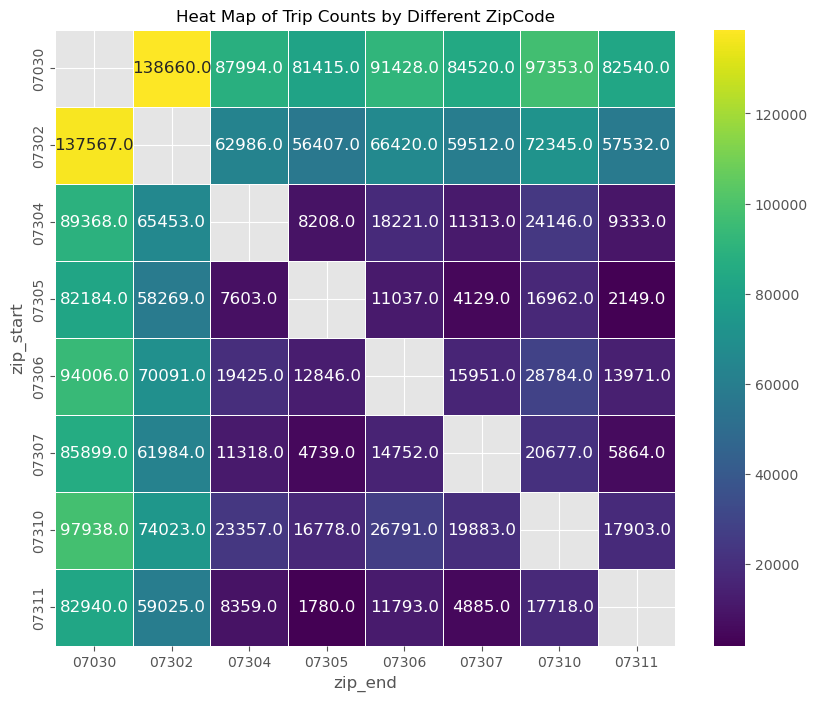

In [72]:
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(10, 8))

diff_zip2 = diff_zip2.pivot(index=['zip_start'],columns=['zip_end'],values='trip_count')

mask = np.zeros_like(diff_zip2, dtype=bool)
np.fill_diagonal(mask, True)

formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}')


#Use seaborn to create the heat map

sns.heatmap(diff_zip2, cmap="viridis", linewidths=.5, annot=True, annot_kws={"size": 12},  fmt='', mask=mask, cbar_kws={'format': formatter})
plt.title('Heat Map of Trip Counts by Different ZipCode',fontsize=12)
plt.show()


[]

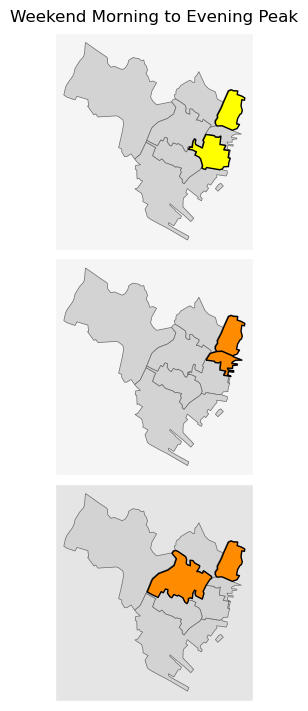

In [73]:
fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(7, 7), sharex=True,sharey=True,constrained_layout=True)

fig.suptitle('Weekend Morning to Evening Peak', fontsize=12)

new_map.plot(ax=ax1, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax1, facecolor='yellow',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax1, facecolor='yellow',edgecolor='black', linewidth=1)

new_map.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax2, facecolor='darkorange',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07310'].plot(ax=ax2, facecolor='darkorange',edgecolor='black',linewidth=1)

new_map.plot(ax=ax3, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax3, facecolor='darkorange',edgecolor='black', linewidth=1)
new_map.loc[new_map['zipcode'] == '07306'].plot(ax=ax3, facecolor='darkorange',edgecolor='black',linewidth=1)


ax.set_title(label ='Trips with Source Destination in Different Zipcode',loc='center', fontsize = 10)

ax1.set_facecolor("whitesmoke")

ax2.set_facecolor("whitesmoke")

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])